# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I Team 3, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from flaml import AutoML

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df = pd.read_csv('df_train.csv')
df_test=pd.read_csv('df_test.csv')
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# look at data statistics
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [5]:
#Find all Null values in each column
df.isnull().sum()


Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [6]:
#Understand the feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [7]:
df.shape

(8763, 49)

In [8]:
df_test.shape

(2920, 48)

Understanding the skew

In [9]:
df.skew()

C:\Users\980430~1\AppData\Local\Temp/ipykernel_77464/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [10]:
df.kurtosis()

C:\Users\980430~1\AppData\Local\Temp/ipykernel_77464/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

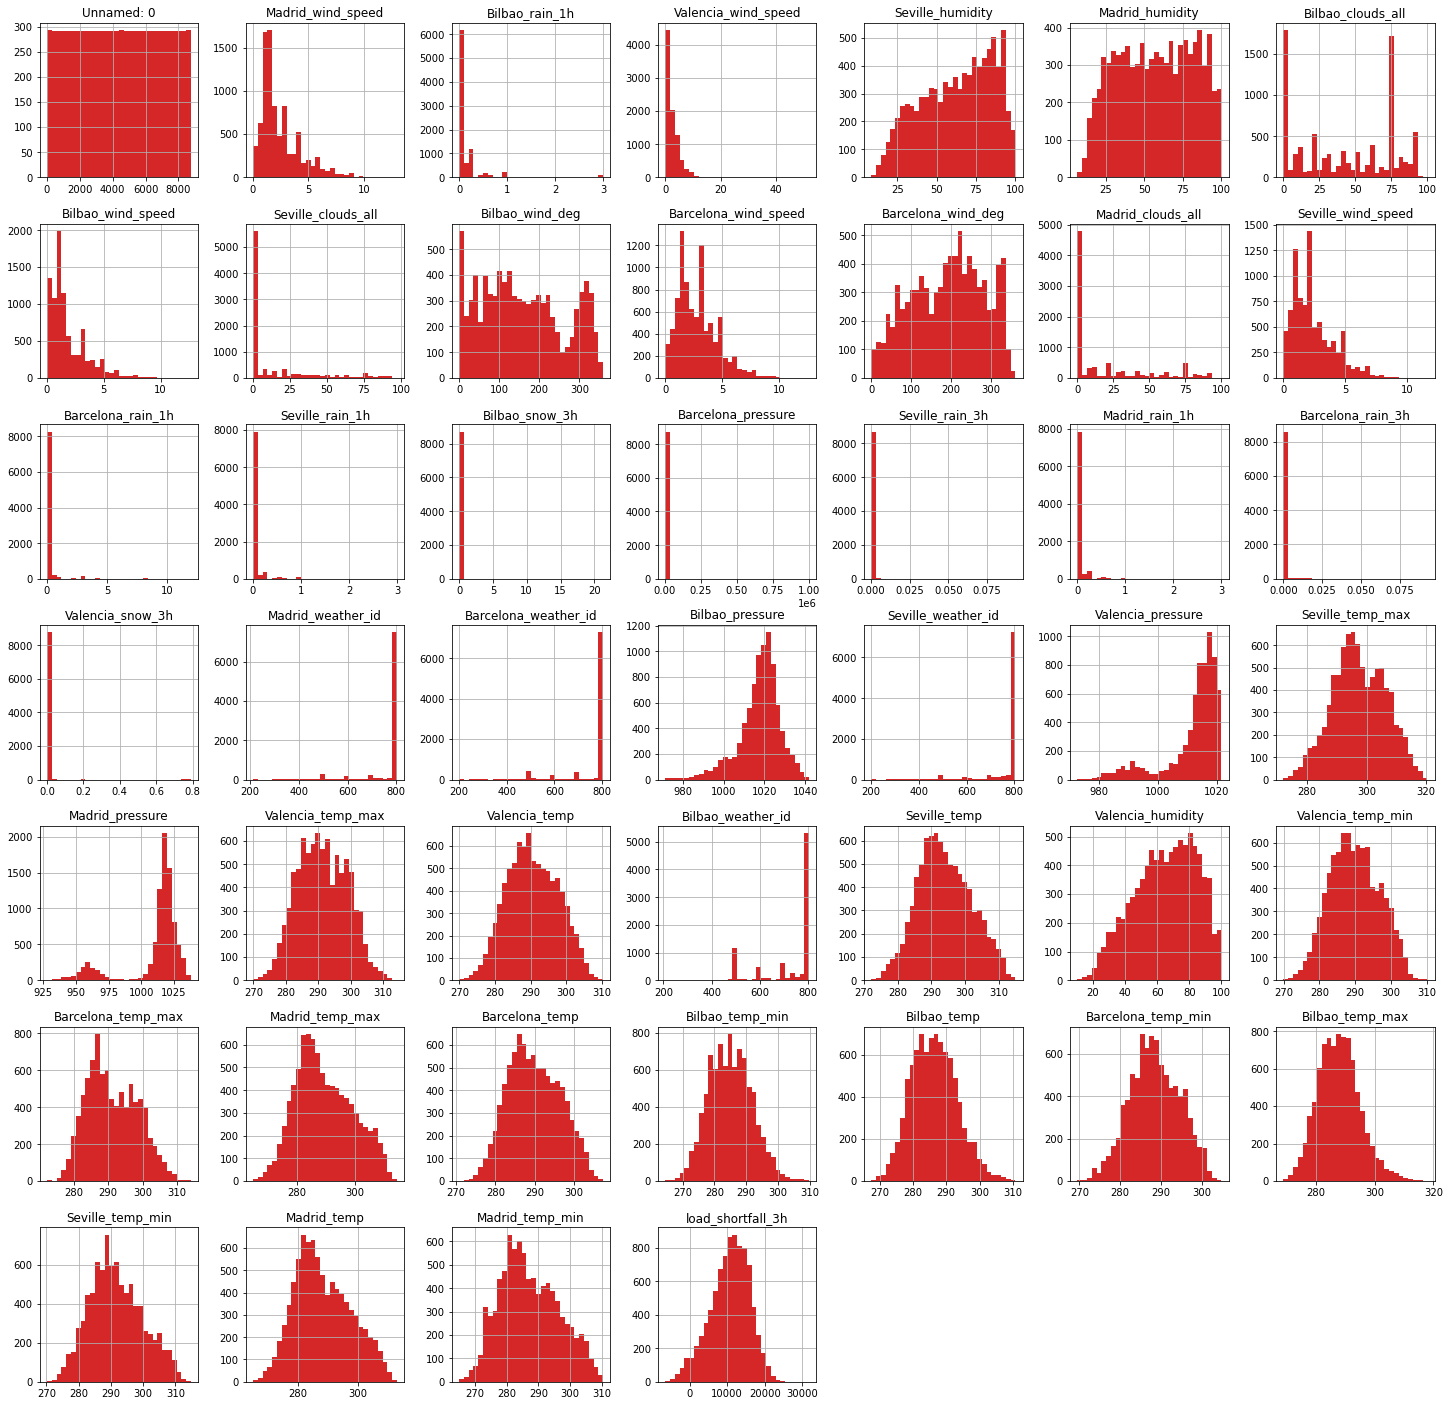

In [11]:
# Understand the feature distributions
df.hist(bins=30, figsize=(25,25), color = 'tab:Red')
plt.show()



<AxesSubplot:>

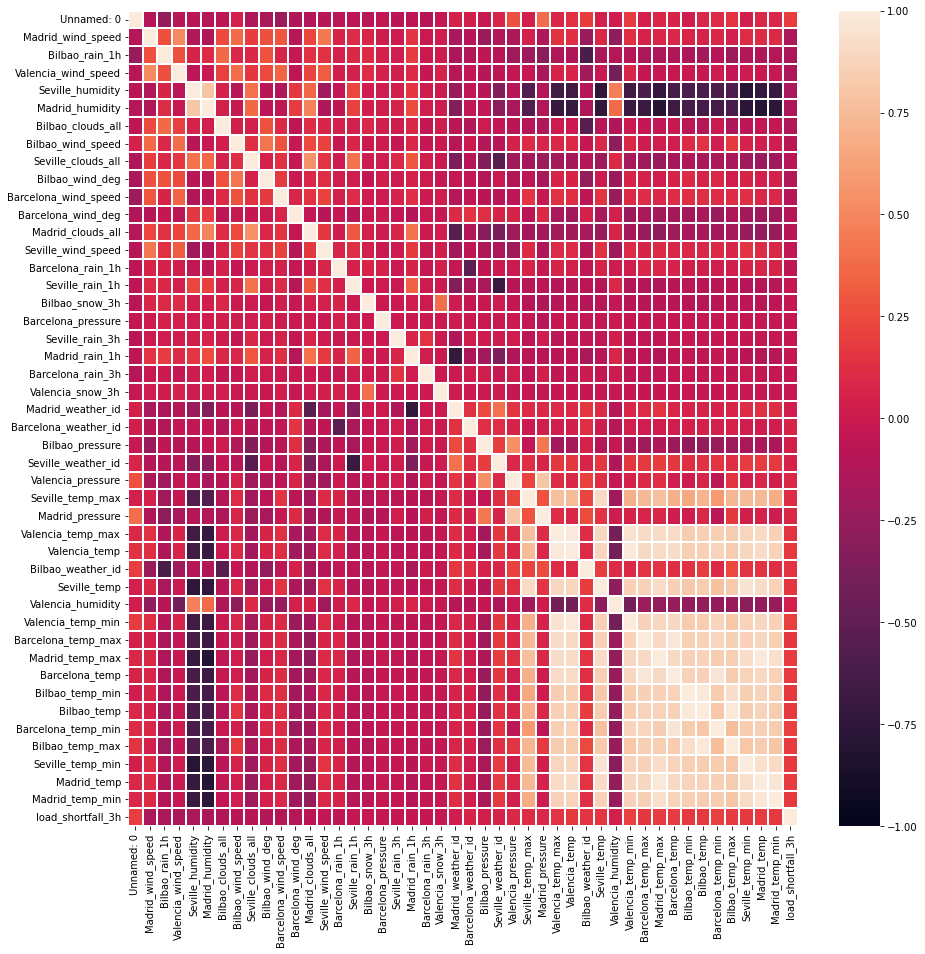

In [11]:
# evaluate correlation
fig, ax = plt.subplots(figsize=(15, 15))

#create heatmap
sns.heatmap(df.corr(),vmin=-1,vmax=1, linewidths=.3)



<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Features Created
Time Features were created since time of year directly affects the amount of renewable energy produced due to seasons and expected weather forecasts. The features created were as follows:
#### 4.1. Year
#### 4.2. Month
#### 4.3. Day
#### 4.4. Time
#### 4.5. Season




In [13]:
# create new features
# Year
# Month
# Day
# Time
df['year'] = pd.DatetimeIndex(df['time']).year
df_test['year'] = pd.DatetimeIndex(df_test['time']).year
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df_test['time'] = pd.to_datetime(df_test['time'], format='%Y-%m-%d %H:%M:%S')
df['hour'] = pd.DatetimeIndex(df['time']).hour
df_test['hour'] = pd.DatetimeIndex(df_test['time']).hour
df['month'] = pd.DatetimeIndex(df['time']).month
df_test['month'] = pd.DatetimeIndex(df_test['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day
df_test['day'] = pd.DatetimeIndex(df_test['time']).day

#test and train new features
for label, row in df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']

        
#For train set
for label, row in df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']
        
        df.loc[label, 'Valencia_pressure'] = round((df[(df['year'] == y) & (df['month'] == m)]['Valencia_pressure']).mean(),1) 


#For test set
for label, row in df_test.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']
        
        df_test.loc[label, 'Valencia_pressure'] = round((df_test[(df_test['year'] == y) & (df_test['month'] == m)]['Valencia_pressure']).mean(),1)

In [14]:
#Create seasons column
df.loc[df['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
df.loc[df['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
df.loc[df['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
df.loc[df['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

df = df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)

df_test.loc[df_test['month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
df_test.loc[df_test['month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
df_test.loc[df_test['month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
df_test.loc[df_test['month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

df_test = df_test.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)

df.columns.shape[0]

57

<AxesSubplot:>

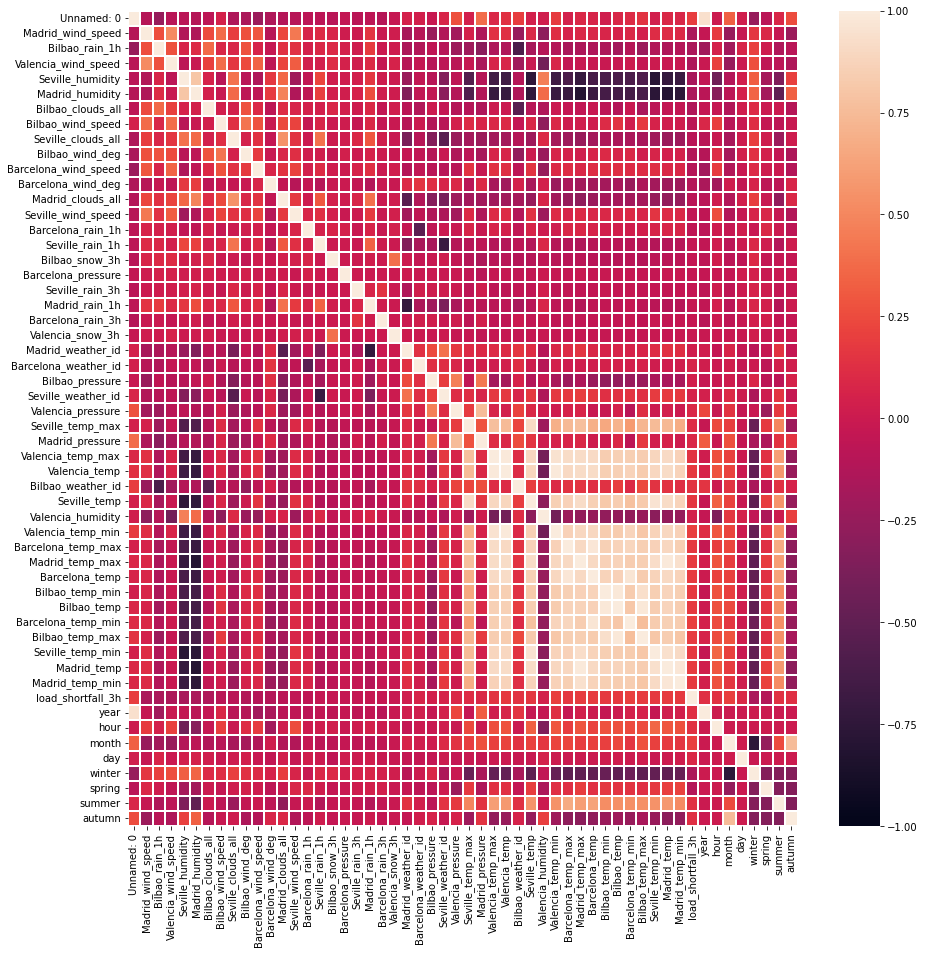

In [17]:
#checking the correlation
fig, ax = plt.subplots(figsize=(15, 15))

#creating heatmap
sns.heatmap(df.corr(),vmin=-1,vmax=1, linewidths=.3)

In [18]:
# remove missing values/ features

#1. Replace all null values with mean for Valencia pressure
def replace_NA(df,column_name):
    mean_col=df[column_name].mean()
    
    df[column_name].fillna(mean_col,inplace=True)
    
    return df.isnull().sum()

replace_NA(df,'Valencia_pressure')
replace_NA(df_test,'Valencia_pressure')

# df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(),inplace=True)
# df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [19]:
# Change the time column from Object to Datetime
df['time']=pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

Valencia_wind_deg and Seville_pressure contain String data i.e. type -> Object
These features are converted to numerical data by mapping each value to the appropiate number 
E.g. Level 5 (in Valencia_wind_deg_ = 5
These features could be removed however they still do provide information to the model and this information can be extracted

In [20]:
#This code makes the model worse
df['Valencia_wind_deg_level']=df.Valencia_wind_deg.map({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 
                                                                    'level_7':7, 'level_6':6, 'level_4':4, 'level_3':3, 
                                                                    'level_1':1, 'level_2':2})


df['Seville_pressure_category']=df.Seville_pressure.map({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19, 'sp22':22, 'sp11':11,
                                                                     'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20, 'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10,
                                                                     'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1})



df_test['Valencia_wind_deg_level']=df_test.Valencia_wind_deg.map({'level_5':5, 'level_10':10, 'level_9':9, 'level_8':8, 
                                                                    'level_7':7, 'level_6':6, 'level_4':4, 'level_3':3, 
                                                                    'level_1':1, 'level_2':2})

df_test['Seville_pressure_category']=df_test.Seville_pressure.map({'sp25':25, 'sp23':23, 'sp24':24, 'sp21':21, 'sp16':16, 'sp9':9, 'sp15':15, 'sp19':19, 'sp22':22, 'sp11':11,
                                                                     'sp8':8, 'sp4':4, 'sp6':6, 'sp13':13, 'sp17':17, 'sp20':20, 'sp18':18, 'sp14':14, 'sp12':12, 'sp5':5, 'sp10':10,
                                                                     'sp7':7, 'sp3':3, 'sp2':2, 'sp1':1})

#### Deleted features
1. Delete Valencia_wind_deg and Seville_pressure since new columns for these features have been created 
2. Delete Time column since all relevant information has been extracted from this column (and since the model cannot use the Time column type for model predictions)
3. Delete unnamed column

In [21]:
#2. Delete Valencia_wind_deg and Seville_pressure
def drop_col(df,column_name):
    df.drop(column_name,axis=1,inplace=True)
    
    return df.columns
drop_col(df,'time')
drop_col(df,'Unnamed: 0')
drop_col(df,'Seville_pressure')
drop_col(df,'Valencia_wind_deg')


drop_col(df_test,'time')
drop_col(df_test,'Unnamed: 0')
drop_col(df_test,'Seville_pressure')
drop_col(df_test,'Valencia_wind_deg')


Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'year', 'hour

In [12]:
#Sanity check on test and train data
#Check that the number of features in train and test are the same 
#N.B Test data will have n-1 features due to Target variable not present
df.shape

(8763, 49)

In [23]:
df_test.shape

(2920, 54)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

The models considered for this data set are:
1. Linear regression
2. Lasso regression
3. Decision trees
4. Ensemble methods
5. Random forests (Hyperparameter tuned)
6. AutoML

In [31]:
# split data
y=df['load_shortfall_3h']
X=df.drop(['load_shortfall_3h'],axis=1)

X.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,year,hour,month,day,winter,spring,summer,autumn,Valencia_wind_deg_level,Seville_pressure_category
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,2015,3,1,1,1,0,0,0,5,25
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,2015,6,1,1,1,0,0,0,10,25
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,2015,9,1,1,1,0,0,0,9,25
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,2015,12,1,1,1,0,0,0,8,25
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,2015,15,1,1,1,0,0,0,7,25


# Create one or more ML models

In [33]:
#Create the model objects

lr=LinearRegression()
lasso = Lasso(alpha=0.01) #alpha is a hyper parameter
regr_tree = DecisionTreeRegressor(max_depth=10,random_state=50)
rf = RandomForestRegressor(random_state=50)
rf_tuned=RandomForestRegressor(n_estimators=46, max_depth=30, random_state=50)
automl = AutoML()


In [34]:
#Using the training data set to test model accuracy
#Normalize data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X) 
#y_scaled = scaler.fit_transform(y) 

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50,shuffle=False)


In [35]:
y_train.head()

0    6715.666667
1    4171.666667
2    4274.666667
3    5075.666667
4    6620.666667
Name: load_shortfall_3h, dtype: float64

In [36]:
#Train the models
lr.fit(x_train,y_train)
lasso.fit(x_train, y_train)
regr_tree.fit(x_train,y_train)
rf.fit(x_train,y_train)
rf_tuned.fit(x_train,y_train)
automl.fit(x_train,y_train, task="regression",metric='rmse',time_budget=500)


C:\Users\9804305066082\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77719451510.99396, tolerance: 18634441.993152138
  model = cd_fast.enet_coordinate_descent(
[flaml.automl: 05-19 19:04:07] {2105} INFO - task = regression
[flaml.automl: 05-19 19:04:07] {2107} INFO - Data split method: uniform
[flaml.automl: 05-19 19:04:07] {2111} INFO - Evaluation method: cv
[flaml.automl: 05-19 19:04:07] {2188} INFO - Minimizing error metric: rmse
[flaml.automl: 05-19 19:04:07] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 05-19 19:04:07] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-19 19:04:07] {2697} INFO - Estimated sufficient time budget=2193s. Estimated necessary time budget=15s.
[flaml.automl: 05-19 19:04:07] {2744} INFO -  at 0.5s,	estimator lgbm's best e

[flaml.automl: 05-19 19:04:34] {2567} INFO - iteration 33, current learner extra_tree
[flaml.automl: 05-19 19:04:35] {2744} INFO -  at 28.6s,	estimator extra_tree's best error=3479.1398,	best estimator rf's best error=3224.5962
[flaml.automl: 05-19 19:04:35] {2567} INFO - iteration 34, current learner rf
[flaml.automl: 05-19 19:04:37] {2744} INFO -  at 30.2s,	estimator rf's best error=3224.5962,	best estimator rf's best error=3224.5962
[flaml.automl: 05-19 19:04:37] {2567} INFO - iteration 35, current learner rf
[flaml.automl: 05-19 19:04:38] {2744} INFO -  at 32.0s,	estimator rf's best error=3224.5962,	best estimator rf's best error=3224.5962
[flaml.automl: 05-19 19:04:38] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 05-19 19:04:41] {2744} INFO -  at 34.2s,	estimator extra_tree's best error=3479.1398,	best estimator rf's best error=3224.5962
[flaml.automl: 05-19 19:04:41] {2567} INFO - iteration 37, current learner rf
[flaml.automl: 05-19 19:04:45] {2744} INFO

[flaml.automl: 05-19 19:07:16] {2567} INFO - iteration 70, current learner xgboost
[flaml.automl: 05-19 19:07:16] {2744} INFO -  at 189.9s,	estimator xgboost's best error=4352.0135,	best estimator rf's best error=3039.6694
[flaml.automl: 05-19 19:07:16] {2567} INFO - iteration 71, current learner xgboost
[flaml.automl: 05-19 19:07:17] {2744} INFO -  at 190.3s,	estimator xgboost's best error=4352.0135,	best estimator rf's best error=3039.6694
[flaml.automl: 05-19 19:07:17] {2567} INFO - iteration 72, current learner xgboost
[flaml.automl: 05-19 19:07:17] {2744} INFO -  at 190.7s,	estimator xgboost's best error=4162.1106,	best estimator rf's best error=3039.6694
[flaml.automl: 05-19 19:07:17] {2567} INFO - iteration 73, current learner xgb_limitdepth
[flaml.automl: 05-19 19:07:18] {2744} INFO -  at 191.1s,	estimator xgb_limitdepth's best error=4134.4543,	best estimator rf's best error=3039.6694
[flaml.automl: 05-19 19:07:18] {2567} INFO - iteration 74, current learner xgboost
[flaml.auto

[flaml.automl: 05-19 19:11:54] {2567} INFO - iteration 107, current learner extra_tree
[flaml.automl: 05-19 19:11:58] {2744} INFO -  at 471.3s,	estimator extra_tree's best error=3059.0314,	best estimator rf's best error=3008.6276
[flaml.automl: 05-19 19:11:58] {2567} INFO - iteration 108, current learner extra_tree
[flaml.automl: 05-19 19:12:00] {2744} INFO -  at 473.6s,	estimator extra_tree's best error=3059.0314,	best estimator rf's best error=3008.6276
[flaml.automl: 05-19 19:12:00] {2567} INFO - iteration 109, current learner extra_tree
[flaml.automl: 05-19 19:12:08] {2744} INFO -  at 481.2s,	estimator extra_tree's best error=2955.0617,	best estimator extra_tree's best error=2955.0617
[flaml.automl: 05-19 19:12:08] {2567} INFO - iteration 110, current learner extra_tree
[flaml.automl: 05-19 19:12:11] {2744} INFO -  at 484.3s,	estimator extra_tree's best error=2955.0617,	best estimator extra_tree's best error=2955.0617
[flaml.automl: 05-19 19:12:11] {2567} INFO - iteration 111, curr

In [37]:
#Making predictions on each model
y_trainPredict_linear=lr.predict(x_train)
y_testPredict_linear=lr.predict(x_test)

y_trainPredict_lasso=lasso.predict(x_train)
y_testPredict_lasso=lasso.predict(x_test)

y_trainPredict_regr_tree=regr_tree.predict(x_train)
y_testPredict_regr_tree=regr_tree.predict(x_test)

y_trainPredict_rf=rf.predict(x_train)
y_testPredict_rf=rf.predict(x_test)


y_trainPredict_rf_tuned=rf_tuned.predict(x_train)
y_testPredict_rf_tuned=rf_tuned.predict(x_test)

y_trainPredict_autoML = automl.predict(x_train)
y_testPredict_autoML = automl.predict(x_test)


### Evaluate one or more ML models

In [38]:
#linear model MSE
linear_model_train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_trainPredict_linear))
linear_model_test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_testPredict_linear))
linear_model_train_r2=r2_score(y_train,y_trainPredict_linear)
linear_model_test_r2=r2_score(y_test,y_testPredict_linear)


#Lasso model MSE
lasso_model_train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_trainPredict_lasso))
lasso_model_test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_testPredict_lasso))
lasso_model_train_r2=r2_score(y_train,y_trainPredict_lasso)
lasso_model_test_r2=r2_score(y_test,y_testPredict_lasso)

#Decision tree model MSE
regr_tree_model_train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_trainPredict_regr_tree))
regr_tree_model_test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_testPredict_regr_tree))
regr_tree_model_train_r2=r2_score(y_train,y_trainPredict_regr_tree)
regr_tree_model_test_r2=r2_score(y_test,y_testPredict_regr_tree)


#Random forest model MSE
rf_model_train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_trainPredict_rf))
rf_model_test_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_testPredict_rf))
rf_model_train_r2=r2_score(y_train,y_trainPredict_rf)
rf_model_test_r2=r2_score(y_test,y_testPredict_rf)

#Hyperparameter tuned Random forest model MSE
rf_tuned_model_train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_trainPredict_rf_tuned))    
rf_tuned_model_test_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_testPredict_rf_tuned))
rf_tuned_model_train_r2=r2_score(y_train,y_trainPredict_rf_tuned)
rf_tuned_model_test_r2=r2_score(y_test,y_testPredict_rf_tuned)

#AutoML model MSE
autoML_model_train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_trainPredict_autoML))    
autoML_model_test_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_testPredict_autoML))
autoML_model_train_r2=r2_score(y_train,y_trainPredict_autoML)
autoML_model_test_r2=r2_score(y_test,y_testPredict_autoML)


Model_results_dict= {'Training MSE':{
                'Linear':linear_model_train_RMSE,
                'Lasso':lasso_model_train_RMSE,
                'Decision Tree':regr_tree_model_train_RMSE,
                'Random Forest':rf_model_train_RMSE,
                'Random Forest Tuned':rf_tuned_model_train_RMSE,
                'AutoML':autoML_model_train_RMSE
    
                                },
                 
                'Test MSE':{
                'Linear':linear_model_test_RMSE,
                'Lasso':lasso_model_test_RMSE,
                'Decision Tree':regr_tree_model_test_RMSE,
                'Random Forest':rf_model_test_RMSE,
                'Random Forest Tuned':rf_tuned_model_test_RMSE,
                'AutoML':autoML_model_test_RMSE


                            },
                'Training R2':{
                'Linear':linear_model_train_r2,
                'Lasso':lasso_model_train_r2,
                'Decision Tree':regr_tree_model_train_r2,
                'Random Forest':rf_model_train_r2,
                'Random Forest Tuned':rf_tuned_model_train_r2,
                'AutoML':autoML_model_train_r2

                                },
                 'Testing R2':{
                  'Linear':linear_model_test_r2,
                   'Lasso':lasso_model_test_r2,
                   'Decision Tree':regr_tree_model_test_r2,
                   'Random Forest':rf_model_test_r2,
                    'Random Forest Tuned':rf_tuned_model_test_r2,
                  'AutoML':autoML_model_test_r2

                     
                 }    
               }


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### The Model performance was rated on the models RMSE and R2 value

In [40]:
# Compare model performance
#Results
results_df = pd.DataFrame(data=Model_results_dict)
results_df


,Training MSE,Test MSE,Training R2,Testing R2
Linear,4711.258100,4870.248151,0.165021,0.002638
Lasso,4711.554710,4869.082325,0.164916,0.003116
Decision Tree,2624.525964,5582.897936,0.740879,-0.310599
Random Forest,1087.674339,4302.992607,0.955496,0.221441
Random Forest Tuned,1125.150967,4298.360072,0.952376,0.223116
AutoML,178.996854,4257.755711,0.998795,0.237725


# Hyper Parameter Tuning

Since the Random Forest model performed relatively well, The hyperparameters associated with this model were tuned inorder to improve the model perfomance

In [41]:
rf_tuned_model_train_RMSE_list=[]
rf_tuned_model_test_RMSE_list=[]
estimator_i_list=[]
max_dept_i_list=[]

In [42]:
#Hyper parameter tuning on Random Forest: 
# This is a quick and manual method of finding the hyperparameters with the lowest RMSE.

train_MSE=1000000000000
test_MSE=1000000000000

estimator_i=46
max_dept_i=30

estimator_i_list.append(estimator_i)
max_dept_i_list.append(max_dept_i)




rf_tuned=RandomForestRegressor(n_estimators=estimator_i, max_depth=max_dept_i, random_state=50)
rf_tuned.fit(x_train,y_train)
y_trainPredict_rf_tuned=rf_tuned.predict(x_train)
y_testPredict_rf_tuned=rf_tuned.predict(x_test)
        
#Model Evaluation
rf_tuned_model_train_RMSE=metrics.mean_squared_error(y_train, y_trainPredict_rf_tuned)
rf_tuned_model_train_RMSE_list.append(rf_tuned_model_train_RMSE)
        
rf_tuned_model_test_RMSE=metrics.mean_squared_error(y_test,y_testPredict_rf_tuned)
rf_tuned_model_test_RMSE_list.append(rf_tuned_model_test_RMSE)


for x in range(len(estimator_i_list)):
    print('estimator_i', estimator_i_list[x], 'max_dept_i=',max_dept_i_list[x],'Train RMSE =', np.round(rf_tuned_model_train_RMSE_list[x],0),'Test RMSE=',np.round(rf_tuned_model_test_RMSE_list[x],0) )
         
# """
#REsults 
# estimator_i 10 max_dept_i= 10 Train RMSE = 5657637.0 Test RMSE= 19800872.0
# estimator_i 20 max_dept_i= 10 Train RMSE = 5468376.0 Test RMSE= 18983224.0
# estimator_i 30 max_dept_i= 10 Train RMSE = 5439312.0 Test RMSE= 18996859.0
# estimator_i 40 max_dept_i= 10 Train RMSE = 5458717.0 Test RMSE= 18944007.0
# estimator_i 50 max_dept_i= 10 Train RMSE = 5459423.0 Test RMSE= 18915907.0
# estimator_i 60 max_dept_i= 10 Train RMSE = 5427904.0 Test RMSE= 19067751.0
# estimator_i 70 max_dept_i= 10 Train RMSE = 5425460.0 Test RMSE= 19164263.0
# estimator_i 80 max_dept_i= 10 Train RMSE = 5404706.0 Test RMSE= 19061155.0
# estimator_i 90 max_dept_i= 10 Train RMSE = 5389808.0 Test RMSE= 19061635.0
# estimator_i 100 max_dept_i= 10 Train RMSE = 5385856.0 Test RMSE= 19055306.0
# estimator_i 45 max_dept_i= 10 Train RMSE = 5472639.0 Test RMSE= 18913085.0
# estimator_i 44 max_dept_i= 10 Train RMSE = 5474048.0 Test RMSE= 18927707.0
# estimator_i 46 max_dept_i= 10 Train RMSE = 5465792.0 Test RMSE= 18819848.0
# estimator_i 47 max_dept_i= 10 Train RMSE = 5466535.0 Test RMSE= 18862619.0
# estimator_i 49 max_dept_i= 10 Train RMSE = 5455713.0 Test RMSE= 18860219.0
# estimator_i 50 max_dept_i= 10 Train RMSE = 5459423.0 Test RMSE= 18915907.0
# estimator_i 46 max_dept_i= 20 Train RMSE = 1327791.0 Test RMSE= 18238427.0
# estimator_i 46 max_dept_i= 30 Train RMSE = 1256565.0 Test RMSE= 18190040.0 -> Best model
# estimator_i 46 max_dept_i= 40 Train RMSE = 1260062.0 Test RMSE= 18196411.0
# estimator_i 46 max_dept_i= 50 Train RMSE = 1260062.0 Test RMSE= 18196411.0
# estimator_i 46 max_dept_i= 80 Train RMSE = 1260062.0 Test RMSE= 18196411.0
# estimator_i 46 max_dept_i= 25 Train RMSE = 1266680.0 Test RMSE= 18328496.0
# estimator_i 46 max_dept_i= 27 Train RMSE = 1261907.0 Test RMSE= 18250958.0
# estimator_i 46 max_dept_i= 29 Train RMSE = 1257513.0 Test RMSE= 18191439.0


# """
        
        


estimator_i 46 max_dept_i= 30 Train RMSE = 1265965.0 Test RMSE= 18475899.0


This set of code finds the Optimal parameters (n_estimators,max_depth ) for the Random Forest Model by looping through 2 for loops between the numbers 25-50
The estimated run time is 7hrs.Hence the code has been commented out but output is shown below.
This code was shown to as proof that a structured methodology was implemented to identify optimal Hyper parameters

In [ ]:
#This set of code finds the Optimal parameters (n_estimators,max_depth )by looping through 2 for loops from 25-50
#The estimated run time is 5hrs. 
#Hyper parameter tuning on Best Model (Random Forest):
# train_MSE=10000000000000
# test_MSE=10000000000000
# rf_tuned_model_train_RMSE_list=[]
# rf_tuned_model_test_RMSE_list=[]
# Best_estimator=0
# Best_max_dept=0

# for estimator_i in range(25,50):
#     for max_dept_i in range(25,50):
#         rf_tuned=RandomForestRegressor(n_estimators=estimator_i, max_depth=max_dept_i, random_state=50)
#         rf_tuned.fit(x_train,y_train)
#         y_trainPredict_rf_tuned=rf_tuned.predict(x_train)
#         y_testPredict_rf_tuned=rf_tuned.predict(x_test)
        
#         #Model Evaluation
#         rf_tuned_model_train_RMSE=metrics.mean_squared_error(y_train, y_trainPredict_rf_tuned)
#         rf_tuned_model_train_RMSE_list.append(rf_tuned_model_train_RMSE)
        
#         rf_tuned_model_test_RMSE=metrics.mean_squared_error(y_test,y_testPredict_rf_tuned)
#         rf_tuned_model_test_RMSE_list.append(rf_tuned_model_test_RMSE)
        
#         if rf_tuned_model_test_RMSE<test_MSE:
#             test_MSE=rf_tuned_model_test_RMSE
#             Best_estimator=estimator_i
#             Best_max_dept=max_dept_i
        

# plt.plot( rf_tuned_model_train_RMSE_list, label='Train MSE')
# plt.plot( rf_tuned_model_test_RMSE_list, label='Test MSE')

# plt.legend(loc="upper right")       

# print('Best n_estimator on Test set= ', Best_estimator)   
# print('Best_max_dept on Test set= ', Best_max_dept)   



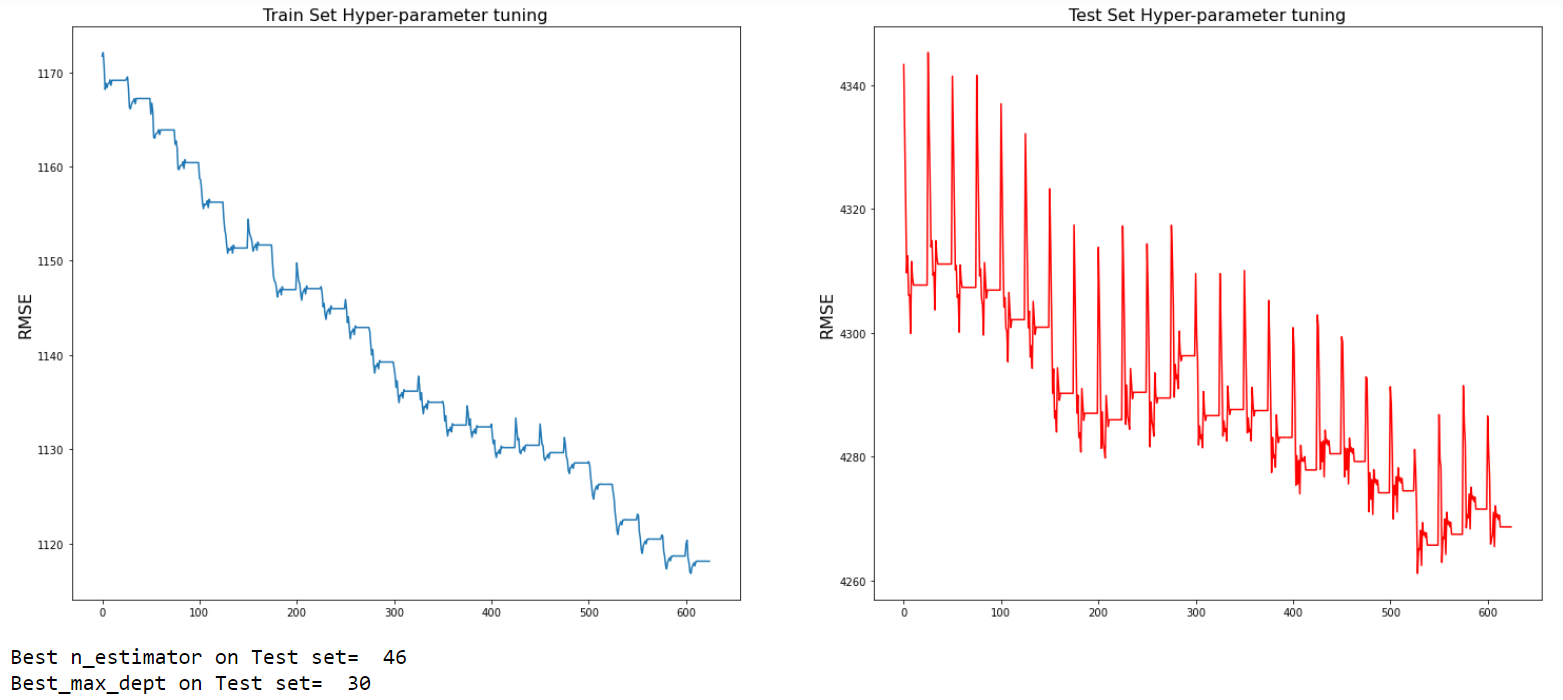

# Displaying the results

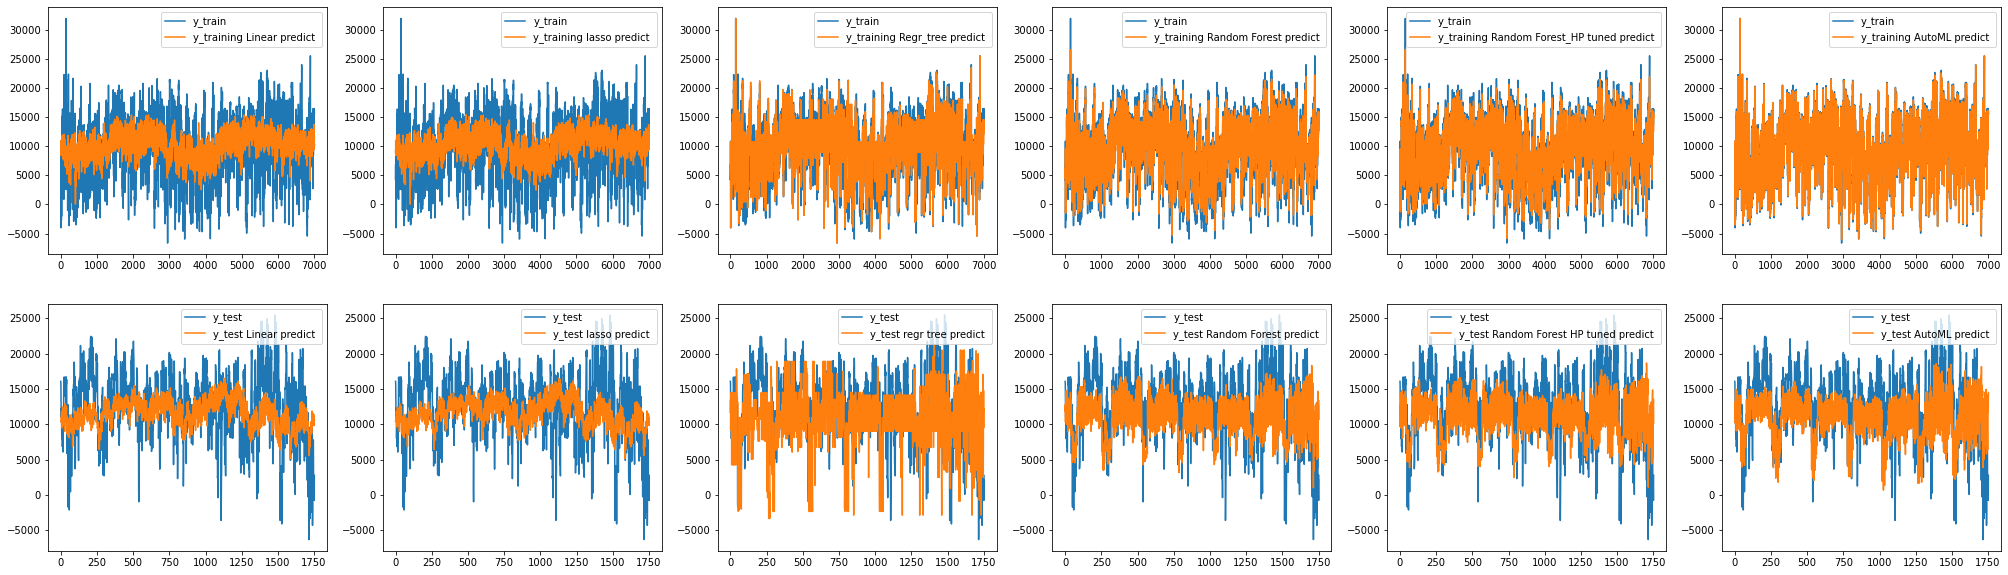

In [63]:
#Displaying the results
fig,ax=plt.subplots(2,6,figsize=(35,10))

y_test=pd.DataFrame(y_test,columns=['load_shortfall_3h'])
y_test.reset_index(inplace = True)


ax[0,0].plot( y_train, label='y_train')
ax[0,0].plot( y_trainPredict_linear, label='y_training Linear predict ')
ax[0,0].legend(loc="upper right")

ax[0,1].plot( y_train, label='y_train')
ax[0,1].plot( y_trainPredict_lasso, label='y_training lasso predict ')
ax[0,1].legend(loc="upper right")

ax[0,2].plot( y_train, label='y_train')
ax[0,2].plot( y_trainPredict_regr_tree, label='y_training Regr_tree predict ')
ax[0,2].legend(loc="upper right")

ax[0,3].plot( y_train, label='y_train')
ax[0,3].plot( y_trainPredict_rf, label='y_training Random Forest predict ')
ax[0,3].legend(loc="upper right")

ax[0,4].plot( y_train, label='y_train')
ax[0,4].plot( y_trainPredict_rf_tuned, label='y_training Random Forest_HP tuned predict ')
ax[0,4].legend(loc="upper right")

ax[0,5].plot( y_train, label='y_train')
ax[0,5].plot( y_trainPredict_autoML, label='y_training AutoML predict ')
ax[0,5].legend(loc="upper right")

#Test plots

ax[1,0].plot( y_test['load_shortfall_3h'], label='y_test')
ax[1,0].plot( y_testPredict_linear, label='y_test Linear predict ')
ax[1,0].legend(loc="upper right")




ax[1,1].plot( y_test['load_shortfall_3h'], label='y_test')
ax[1,1].plot( y_testPredict_lasso, label='y_test lasso predict ')
ax[1,1].legend(loc="upper right")


ax[1,2].plot( y_test['load_shortfall_3h'], label='y_test')
ax[1,2].plot( y_testPredict_regr_tree, label='y_test regr tree predict ')
ax[1,2].legend(loc="upper right")

ax[1,3].plot( y_test['load_shortfall_3h'], label='y_test')
ax[1,3].plot( y_testPredict_rf, label='y_test Random Forest predict ')
ax[1,3].legend(loc="upper right")

ax[1,4].plot( y_test['load_shortfall_3h'], label='y_test')
ax[1,4].plot( y_testPredict_rf_tuned, label='y_test Random Forest HP tuned predict ')
ax[1,4].legend(loc="upper right")

ax[1,5].plot( y_test['load_shortfall_3h'], label='y_test')
ax[1,5].plot( y_testPredict_autoML, label='y_test AutoML predict ')
ax[1,5].legend(loc="upper right")


plt.show()

In [44]:
# Choose best model and motivate why it is the best choice


As can  be seen in both the Displayed results and the RMSE scores, the AutoML model performs the best, with 

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Submission code

In [45]:
#Linear Model
x_train=df.drop(['load_shortfall_3h'],axis=1)
X_test=df_test


lr.fit(x_train,y)
lasso.fit(x_train,y)
regr_tree.fit(x_train,y)
rf.fit(x_train,y)
rf_tuned.fit(x_train,y)
automl.fit(x_train,y, task="regression",metric='rmse')


Y_testPredict_linear=lr.predict(X_test)
Y_testPredict_lasso=lasso.predict(X_test)
Y_testPredict_regr_tree=regr_tree.predict(X_test)
Y_testPredict_rf=rf.predict(X_test)
Y_testPredict_rf_tuned=rf_tuned.predict(X_test)
Y_testPredict_autoML=automl.predict(X_test)


C:\Users\9804305066082\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96523698734.06738, tolerance: 23857180.850196682
  model = cd_fast.enet_coordinate_descent(
[flaml.automl: 05-19 19:15:21] {2105} INFO - task = regression
[flaml.automl: 05-19 19:15:21] {2107} INFO - Data split method: uniform
[flaml.automl: 05-19 19:15:21] {2111} INFO - Evaluation method: holdout
[flaml.automl: 05-19 19:15:21] {2188} INFO - Minimizing error metric: rmse
[flaml.automl: 05-19 19:15:21] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 05-19 19:15:21] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-19 19:15:21] {2697} INFO - Estimated sufficient time budget=949s. Estimated necessary time budget=7s.
[flaml.automl: 05-19 19:15:21] {2744} INFO -  at 0.4s,	estimator lgbm's bes

[flaml.automl: 05-19 19:15:28] {2567} INFO - iteration 34, current learner rf
[flaml.automl: 05-19 19:15:29] {2744} INFO -  at 8.5s,	estimator rf's best error=3239.0044,	best estimator rf's best error=3239.0044
[flaml.automl: 05-19 19:15:29] {2567} INFO - iteration 35, current learner xgboost
[flaml.automl: 05-19 19:15:29] {2744} INFO -  at 8.6s,	estimator xgboost's best error=4511.6451,	best estimator rf's best error=3239.0044
[flaml.automl: 05-19 19:15:29] {2567} INFO - iteration 36, current learner extra_tree
[flaml.automl: 05-19 19:15:29] {2744} INFO -  at 8.9s,	estimator extra_tree's best error=3556.1407,	best estimator rf's best error=3239.0044
[flaml.automl: 05-19 19:15:29] {2567} INFO - iteration 37, current learner extra_tree
[flaml.automl: 05-19 19:15:29] {2744} INFO -  at 9.1s,	estimator extra_tree's best error=3556.1407,	best estimator rf's best error=3239.0044
[flaml.automl: 05-19 19:15:29] {2567} INFO - iteration 38, current learner extra_tree
[flaml.automl: 05-19 19:15:3

[flaml.automl: 05-19 19:16:02] {2567} INFO - iteration 71, current learner xgb_limitdepth
[flaml.automl: 05-19 19:16:02] {2744} INFO -  at 41.5s,	estimator xgb_limitdepth's best error=3980.8259,	best estimator rf's best error=2949.1791
[flaml.automl: 05-19 19:16:02] {2567} INFO - iteration 72, current learner xgb_limitdepth
[flaml.automl: 05-19 19:16:02] {2744} INFO -  at 41.7s,	estimator xgb_limitdepth's best error=3980.8259,	best estimator rf's best error=2949.1791
[flaml.automl: 05-19 19:16:02] {2567} INFO - iteration 73, current learner xgb_limitdepth
[flaml.automl: 05-19 19:16:02] {2744} INFO -  at 41.8s,	estimator xgb_limitdepth's best error=3879.4481,	best estimator rf's best error=2949.1791
[flaml.automl: 05-19 19:16:02] {2567} INFO - iteration 74, current learner extra_tree
[flaml.automl: 05-19 19:16:02] {2744} INFO -  at 42.1s,	estimator extra_tree's best error=3457.5218,	best estimator rf's best error=2949.1791
[flaml.automl: 05-19 19:16:02] {2567} INFO - iteration 75, curre

In [46]:
#Linear Results
df_linearModel=pd.DataFrame(Y_testPredict_linear,columns=['load_shortfall_3h'])
df_lassoModel=pd.DataFrame(Y_testPredict_lasso,columns=['load_shortfall_3h'])
df_regr_tree=pd.DataFrame(Y_testPredict_regr_tree,columns=['load_shortfall_3h'])
df_rf=pd.DataFrame(Y_testPredict_rf,columns=['load_shortfall_3h'])
df_rf_tuned=pd.DataFrame(Y_testPredict_rf_tuned,columns=['load_shortfall_3h'])
df_autoML=pd.DataFrame(Y_testPredict_autoML,columns=['load_shortfall_3h'])


df_autoML.head()


,load_shortfall_3h
0,10416.886082
1,7831.887546
2,7238.678214
3,9919.359362
4,11424.641631


In [54]:
#CSV
df_test=pd.read_csv('df_test.csv')

Linear_output=pd.DataFrame({'time':df_test['time']})
#Linear_output.reset_index(inplace = True)

Lasso_output=pd.DataFrame({'time':df_test['time']})
#Lasso_output.reset_index(inplace = True)

Regr_tree_output=pd.DataFrame({'time':df_test['time']})
#Regr_tree_output.reset_index(inplace = True)

Rf_output=pd.DataFrame({'time':df_test['time']})

Rf_tuned_output=pd.DataFrame({'time':df_test['time']})

AutoML_output=pd.DataFrame({'time':df_test['time']})



Linear_output.join(df_linearModel)
Linear_submission=Linear_output.join(df_linearModel)
Linear_submission.to_csv('Linear_submission.csv',index=False)


Lasso_output.join(df_lassoModel)
Lasso_submission=Lasso_output.join(df_lassoModel)
Lasso_submission.to_csv('Lasso_submission.csv',index=False)

Regr_tree_output.join(df_regr_tree)
Regr_tree_submission=Regr_tree_output.join(df_regr_tree)
Regr_tree_submission.to_csv('Regr_tree_submission.csv',index=False)


Rf_output.join(df_rf)
Rf_submission=Rf_output.join(df_rf)
Rf_submission.to_csv('Rf_submission.csv',index=False)


Rf_tuned_output.join(df_rf_tuned)
Rf_tuned_submission=Rf_tuned_output.join(df_rf_tuned)
Rf_tuned_submission.to_csv('Rf_tuned_submission.csv',index=False)


AutoML_submission=AutoML_output.join(df_autoML)
AutoML_submission.to_csv('AutoML_submission.csv',index=False)

In [55]:
Linear_submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8233.647418
1,2018-01-01 03:00:00,7842.753960
2,2018-01-01 06:00:00,8932.129997
3,2018-01-01 09:00:00,8754.887726
4,2018-01-01 12:00:00,8354.750960


In [56]:
Lasso_submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8251.603407
1,2018-01-01 03:00:00,7897.546300
2,2018-01-01 06:00:00,8915.583030
3,2018-01-01 09:00:00,8780.816517
4,2018-01-01 12:00:00,8353.449412


In [57]:
Regr_tree_submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,3716.000000
1,2018-01-01 03:00:00,10004.000000
2,2018-01-01 06:00:00,8571.166667
3,2018-01-01 09:00:00,13440.666667
4,2018-01-01 12:00:00,10017.000000


In [58]:
Rf_submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10540.450000
1,2018-01-01 03:00:00,8387.876667
2,2018-01-01 06:00:00,7699.780000
3,2018-01-01 09:00:00,10394.043333
4,2018-01-01 12:00:00,12574.460000


In [59]:
Rf_tuned_submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10568.688406
1,2018-01-01 03:00:00,8467.420290
2,2018-01-01 06:00:00,8337.811594
3,2018-01-01 09:00:00,11017.514493
4,2018-01-01 12:00:00,12863.739130


In [60]:
AutoML_submission.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10416.886082
1,2018-01-01 03:00:00,7831.887546
2,2018-01-01 06:00:00,7238.678214
3,2018-01-01 09:00:00,9919.359362
4,2018-01-01 12:00:00,11424.641631


# Discuss chosen methods logic

High Kurtosis = large number of outliers

Models to Try
1. Linear regression
2. Lasso regression
3. Decision trees
4. Ensemble methods
5. Random forests (Hyperparameter tuned)
6. AutoML